# Vector manipulation in Python

In this lab, you will have the opportunity to practice once again with the NumPy library. This time, we will explore some advanced operations with arrays and matrices.

At the end of the previous module, we used PCA to transform a set of many variables into a set of only two uncorrelated variables. This process was made through a transformation of the data called rotation. 

In this week's assignment, you will need to find a transformation matrix from English to French vector space embeddings. Such a transformation matrix is nothing else but a matrix that rotates and scales vector spaces.

In this notebook, we will explain in detail the rotation transformation. 

## Transforming vectors

There are three main vector transformations:
* Scaling
* Translation
* Rotation

In previous notebooks, we have applied the first two kinds of transformations. Now, let us learn how to use a fundamental transformation on vectors called _rotation_.

The rotation operation changes the direction of a vector, letting unaffected its dimensionality and its norm. Let us explain with some examples. 

In the following cells, we will define a NumPy matrix and a NumPy array. Soon we will explain how this is related to matrix rotation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils_nb import plot_vectors

### Example 1

In [7]:
# create a 2x2 matrix...
R = np.array([[2,0],[0,-2]])
print("The 2X2 matrix created is : ")
print(R)

The 2X2 matrix created is : 
[[ 2  0]
 [ 0 -2]]


In [11]:
# create a Vector X...
X = np.array([[1,1]])   # this is a 1X2 matrix
print('The Vector X is : ')
print(X)

The Vector X is : 
[[1 1]]


The dot product between a vector and a square matrix produces a rotation and a scaling of the original vector. 

Remember that our recommended way to get the dot product in Python is np.dot(a, b):

In [12]:
# Performing dot product of X and R...
print('The Dot product of X and R is : ')
y = np.dot(X,R)
print(y)    # this is a 1X2 matrix...

The Dot product of X and R is : 
[[ 2 -2]]


We are going to use Pyplot to inspect the effect of the rotation on 2D vectors visually. For that, we have created a function `plot_vectors()` that takes care of all the intricate parts of the visual formatting. The code for this function is inside the `utils_nb.py` file. 

Now we can plot the vector $\vec x = [1, 1]$ in a cartesian plane. The cartesian plane will be centered at `[0,0]` and its x and y limits will be between `[-4, +4]`

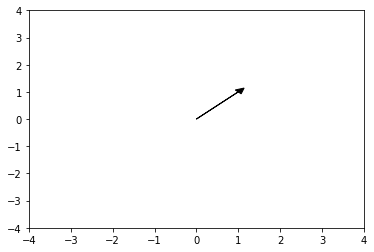

In [17]:
plot_vectors([X], axes=[4,4], fname='transform_x.svg')

Now, let's plot in the same system our vector $\vec x = [1, 1]$ and its dot product with the matrix

$$Ro = \begin{bmatrix} 2 & 0 \\ 0 & -2 \end{bmatrix}$$

$$y = x \cdot Ro = [[-2, 2]]$$

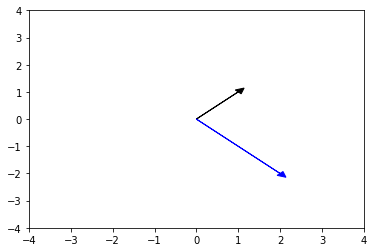

In [18]:
plot_vectors([X,y], axes=[4,4], fname='transform_dot.svg')

Note that the output vector `y` (blue) is transformed in another vector. 

### Example 2

We are going to use Pyplot to inspect the effect of the rotation on 2D vectors visually. For that, we have created a function that takes care of all the intricate parts of the visual formatting. The following procedure plots an arrow within a Pyplot canvas.

Data that is composed of 2 real attributes is telling to belong to a $ RxR $ or $ R^2 $ space. Rotation matrices in $R^2$ rotate a given vector $\vec x$ by a counterclockwise angle $\theta$ in a fixed coordinate system. Rotation matrices are of the form:

$$Ro = \begin{bmatrix} cos \theta & -sin \theta \\ sin \theta & cos \theta \end{bmatrix}$$

The trigonometric functions in Numpy require the angle in radians, not in degrees. In the next cell, we define a rotation matrix that rotates vectors by $45^o$.

In [44]:
# convert degrees to radians...
angle = 60 * (np.pi/180)

print('Angle in Radians is : ')
print(angle)

print()

# create a Rotation matrix...
Ro = np.array([[np.cos(angle), -np.sin(angle)],[np.sin(angle), np.cos(angle)]])

print('Rotation Matrix is : ')
print(Ro)

print()

# create a 1x2 row vector...
xo = np.array([2,2]).reshape(1,-1)
print('Initial Row Vector is : ')
print(xo)

print()

# compute the dot product...
yo = np.dot(xo, Ro)

print('Resulting Vector after Dot Product is : ')
print(yo)

print('\n Normalization of the Row Vector is : ', np.linalg.norm(xo))
print('\n Normalization of the Rotation Matrix is : ', np.linalg.norm(Ro))
print('\n Normalization of the Resultant Vector is : ', np.linalg.norm(yo))

Angle in Radians is : 
1.0471975511965976

Rotation Matrix is : 
[[ 0.5       -0.8660254]
 [ 0.8660254  0.5      ]]

Initial Row Vector is : 
[[2 2]]

Resulting Vector after Dot Product is : 
[[ 2.73205081 -0.73205081]]

 Normalization of the Row Vector is :  2.8284271247461903

 Normalization of the Rotation Matrix is :  1.4142135623730951

 Normalization of the Resultant Vector is :  2.8284271247461903


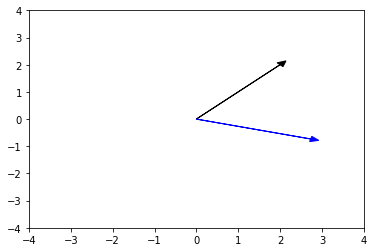

In [45]:
# plot the vectors...
plot_vectors([xo, yo], axes=[4,4], fname='transform_rotation.svg')

Some points to note:

* The norm of the input vector is the same as the norm of the output vector. Rotations matrices do not modify the norm of the vector, only its direction.
* The norm of any $R^2$ rotation matrix is always $\sqrt 2 = 1.414221$

## Frobenius Norm

The Frobenius norm is the generalization to $R^2$ of the already known norm function for vectors 

$$\| \vec a \| = \sqrt {{\vec a} \cdot {\vec a}} $$

For a given $R^2$ matrix A, the frobenius norm is defined as:

$$\|\mathrm{A}\|_{F} \equiv \sqrt{\sum_{i=1}^{m} \sum_{j=1}^{n}\left|a_{i j}\right|^{2}}$$


In [46]:
# create a square matrix A...
A = np.array([[2,2],[2,2]])

print('Square Matrix is : ')
print(A)

Square Matrix is : 
[[2 2]
 [2 2]]


`np.square()` is a way to square each element of a matrix. It must be equivalent to use the * operator in Numpy arrays.

In [47]:
A_squared = np.square(A)

print('Square of this matrix is : ')
print(A_squared)

Square of this matrix is : 
[[4 4]
 [4 4]]


Now you can sum over the elements of the resulting array, and then get the square root of the sum.

In [48]:
Frobenius_A = np.sqrt(np.sum(A_squared))
print('Frobenius of A is : ')
print(Frobenius_A)

Frobenius of A is : 
4.0


That was the extended version of the `np.linalg.norm()` function. You can check that it yields the same result.

In [50]:
print('Checking the frobenius result with the norm : ')
print(np.sqrt(np.sum(Ro * Ro)), '== ', np.linalg.norm(Ro))
print(np.linalg.norm(Ro) == np.sqrt(np.sum(Ro * Ro)))

Checking the frobenius result with the norm : 
1.4142135623730951 ==  1.4142135623730951
True


**Congratulations!! We've covered a few more matrix operations in this lab. This will come in handy in this week's programming assignment!**